Carga el archivo retail_sales.csv en un DataFrame de Pandas.

In [1]:
import pandas as pd

df = pd.read_csv('../data/retail_sales.csv')

Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.

In [2]:
print(df.head(10))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

Muestra las últimas 5 filas del DataFrame.

In [3]:
print(df.tail(5))

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#convertir columnas a numeros
col_numeric =  ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount',]

for i in col_numeric:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# convertir a fecha

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# convertir a categorias

col_categorias = [ 'Customer ID', 'Gender', 'Product Category',]

for i in col_categorias:
    df[i] = df[i].astype('category')  


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   category      
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(5)
memory usage: 91.3 KB
None


Genera estadísticas descriptivas del DataFrame utilizando el método describe().

In [6]:
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

Inspecciona los tipos de datos de cada columna utilizando el atributo dtypes.



In [7]:
print(df.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID               category
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


Cuenta los valores únicos en la columna Producto utilizando el método value_counts().

In [8]:
print(df['Product Category'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


Muestra todos los valores únicos en la columna Tienda utilizando el método unique().

In [9]:
print(df['Product Category'].unique())

['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']


Filtra el DataFrame para mostrar solo las filas donde las ventas (Ventas) sean mayores a 50.

In [10]:
ventas_mayores_50 = df[df['Total Amount'] > 50]
print("\nFilas donde Ventas > 50:")
print(ventas_mayores_50)


Filas donde Ventas > 50:
     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
7                 8 2023-02-22     CUST008    Male   30      Electronics   
..              ...        ...         ...     ...  ...              ...   
993             994 2023-12-18     CUST994  Female   51           Beauty   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3  

Filtra el DataFrame para mostrar solo las filas donde el precio (Precio) sea menor a 0.5.


In [11]:
precio_menor_05 = df[df['Price per Unit'] < 0.5]
print("\nFilas donde Precio < 0.5:")
print(precio_menor_05)


Filas donde Precio < 0.5:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


Utilizando el método query(), filtra el DataFrame para mostrar las filas donde el producto sea Manzanas y las ventas sean mayores a 30.


In [7]:
ventas_mayores_30 = df.query("`Product Category` == 'Electronics' and `Total Amount` > 30")
print("\nFilas donde Product Category es 'Electronics' y Total Amount > 30:")
print(ventas_mayores_30)


Filas donde Product Category es 'Electronics' y Total Amount > 30:
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
7                 8  2023-02-22     CUST008    Male   30      Electronics   
8                 9  2023-12-13     CUST009    Male   63      Electronics   
12               13  2023-08-05     CUST013    Male   22      Electronics   
14               15  2023-01-16     CUST015  Female   42      Electronics   
17               18  2023-04-30     CUST018  Female   47      Electronics   
..              ...         ...         ...     ...  ...              ...   
984             985  2023-05-30     CUST985  Female   19      Electronics   
991             992  2023-08-21     CUST992  Female   57      Electronics   
992             993  2023-02-06     CUST993  Female   48      Electronics   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Qu


Selecciona y muestra solo las columnas Producto y Ventas del DataFrame.


In [12]:
producto_ventas = df[['Product Category', 'Total Amount']]
print("\nColumnas 'Producto' y 'Ventas':")
print(producto_ventas)


Columnas 'Producto' y 'Ventas':
    Product Category  Total Amount
0             Beauty           150
1           Clothing          1000
2        Electronics            30
3           Clothing           500
4             Beauty           100
..               ...           ...
995         Clothing            50
996           Beauty            90
997           Beauty           100
998      Electronics           150
999      Electronics           120

[1000 rows x 2 columns]


Utilizando loc[], selecciona y muestra las filas de la 5 a la 10 (inclusive) y las columnas Producto y Tienda.


In [13]:
loc_seleccion = df.loc[5:10, ['Product Category', 'Customer ID']]
print("\nFilas de la 5 a la 10 y columnas 'Producto' y 'Modelo':")
print(loc_seleccion)


Filas de la 5 a la 10 y columnas 'Producto' y 'Modelo':
   Product Category Customer ID
5            Beauty     CUST006
6          Clothing     CUST007
7       Electronics     CUST008
8       Electronics     CUST009
9          Clothing     CUST010
10         Clothing     CUST011


Utilizando iloc[], selecciona y muestra las primeras 5 filas y las primeras 3 columnas del DataFrame.

In [14]:
iloc_seleccion = df.iloc[:5, :3]
print("\nPrimeras 5 filas y primeras 3 columnas:")
print(iloc_seleccion)


Primeras 5 filas y primeras 3 columnas:
   Transaction ID       Date Customer ID
0               1 2023-11-24     CUST001
1               2 2023-02-27     CUST002
2               3 2023-01-13     CUST003
3               4 2023-05-21     CUST004
4               5 2023-05-06     CUST005


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

In [15]:
# Calcular el ingreso total por venta
df['Ingreso_Total'] = df['Quantity'] * df['Price per Unit']

# Normalizar las ventas entre 0 y 1
df['Ventas_Normalizadas'] = (df['Quantity'] - df['Quantity'].min()) / (df['Quantity'].max() - df['Quantity'].min())

# Visualizar las primeras filas para confirmar
print(df[['Quantity', 'Ingreso_Total', 'Ventas_Normalizadas']].head())


   Quantity  Ingreso_Total  Ventas_Normalizadas
0         3            150             0.666667
1         2           1000             0.333333
2         1             30             0.000000
3         1            500             0.000000
4         2            100             0.333333


Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [16]:
# Clasificar las ventas en 'Baja', 'Media' y 'Alta'
df['Categoria_Ventas'] = pd.cut(df['Quantity'], bins=[0, 10, 20, float('inf')], labels=['Baja', 'Media', 'Alta'])

# Verificar la nueva columna de categorías
print(df[['Quantity', 'Categoria_Ventas']].head())


   Quantity Categoria_Ventas
0         3             Baja
1         2             Baja
2         1             Baja
3         1             Baja
4         2             Baja


Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

In [6]:
# Agrupación por Producto y Genero y cálculo de estadísticas
grupo_producto_tienda = df.groupby(['Product Category', 'Gender']).agg({
    'Ingreso_Total': ['sum', 'mean', 'std'],  # Calcular suma, media y desviación estándar de los ingresos
    'Quantity': 'count',  # Contar el número de ventas
    'Price per Unit': ['min', 'max']  # Obtener el precio mínimo y máximo en cada grupo
})

# Mostrar el resultado de la agrupación
print(grupo_producto_tienda.head())


                        Ingreso_Total                         Quantity  \
                                  sum        mean         std    count   
Product Category Gender                                                  
Beauty           Female         74830  450.783133  538.735040      166   
                 Male           68685  487.127660  592.899725      141   
Clothing         Female         81275  467.097701  577.016491      174   
                 Male           74305  419.802260  524.116237      177   
Electronics      Female         76735  451.382353  548.644646      170   

                        Price per Unit       
                                   min  max  
Product Category Gender                      
Beauty           Female             25  500  
                 Male               25  500  
Clothing         Female             25  500  
                 Male               25  500  
Electronics      Female             25  500  


Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [17]:
# Extraer mes de una columna de fecha (si existe)
df['Mes'] = pd.to_datetime(df['Date']).dt.month

# Agrupación por Producto y Mes
grupo_producto_mes = df.groupby(['Product Category', 'Mes']).agg({
    'Ingreso_Total': 'sum',
    'Quantity': 'mean'
})

# Mostrar el resultado de la agrupación
print(grupo_producto_mes.head())


                      Ingreso_Total  Quantity
Product Category Mes                         
Beauty           1            13930  2.384615
                 2            14035  2.615385
                 3            10545  2.428571
                 4            11905  2.379310
                 5            12450  2.321429


C:\Users\Acer\AppData\Local\Temp\ipykernel_9728\819444487.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_producto_mes = df.groupby(['Product Category', 'Mes']).agg({


Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.

In [18]:
# Calcular la desviación de cada venta respecto a la media del grupo Producto
def desviacion_respecto_media(grupo):
    grupo['Desviacion_Venta'] = grupo['Quantity'] - grupo['Quantity'].mean()
    return grupo

# Aplicar la función personalizada usando apply en un groupby
df = df.groupby('Product Category').apply(desviacion_respecto_media)

# Verificar la nueva columna
print(df[['Product Category', 'Quantity', 'Desviacion_Venta']].head())


                    Product Category  Quantity  Desviacion_Venta
Product Category                                                
Beauty           0            Beauty         3          0.488599
                 4            Beauty         2         -0.511401
                 5            Beauty         1         -1.511401
                 11           Beauty         3          0.488599
                 20           Beauty         1         -1.511401


C:\Users\Acer\AppData\Local\Temp\ipykernel_9728\1300151746.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('Product Category').apply(desviacion_respecto_media)
C:\Users\Acer\AppData\Local\Temp\ipykernel_9728\1300151746.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Product Category').apply(desviacion_respecto_media)


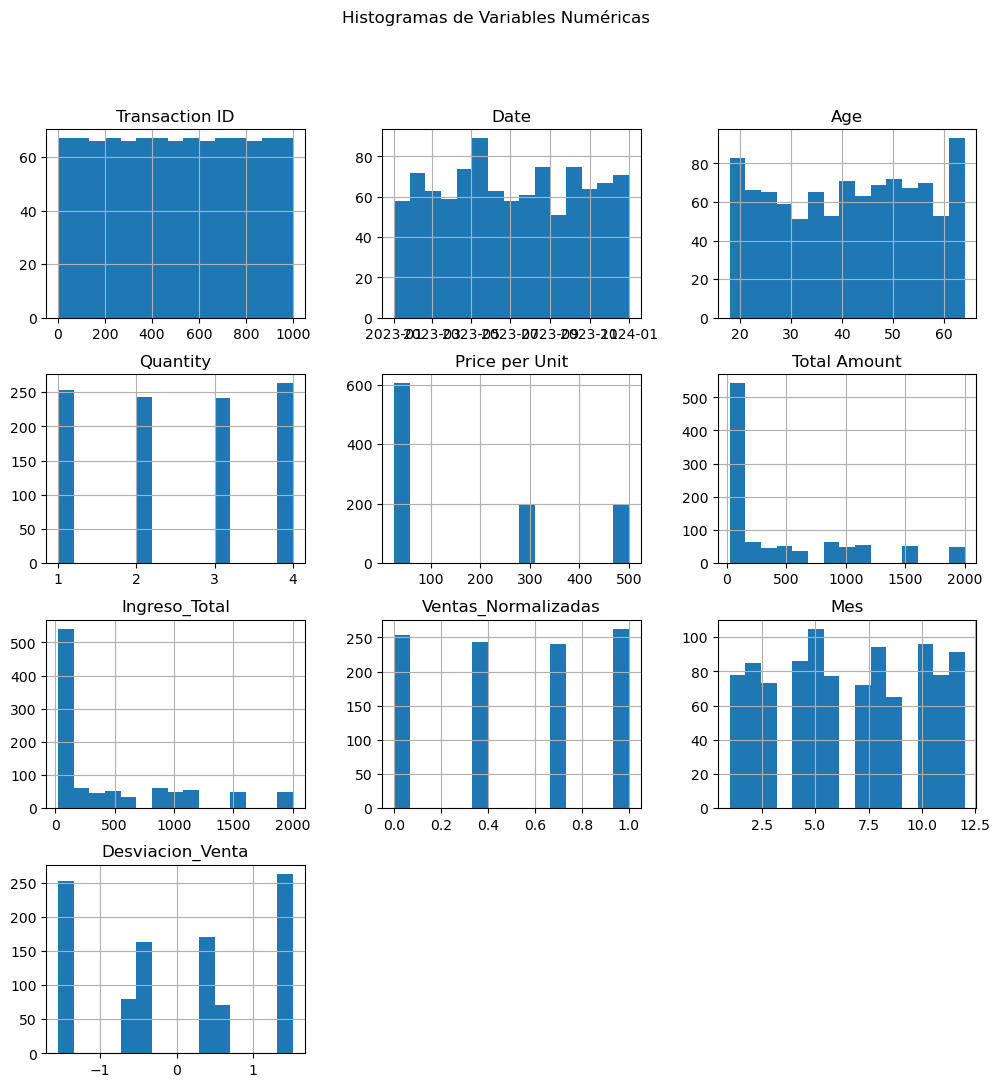

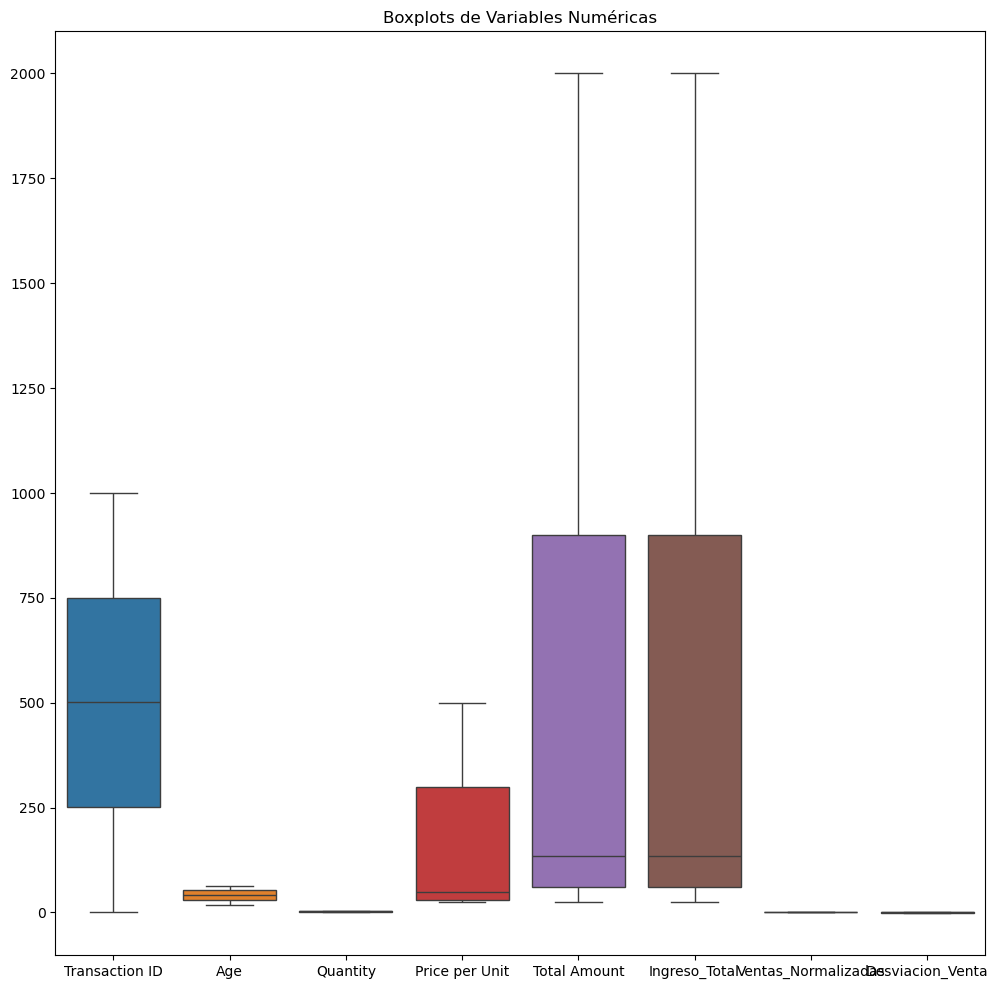

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
df.hist(bins=15, figsize=(12, 12))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Boxplots
plt.figure(figsize=(12, 12))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplots de Variables Numéricas')
plt.show()

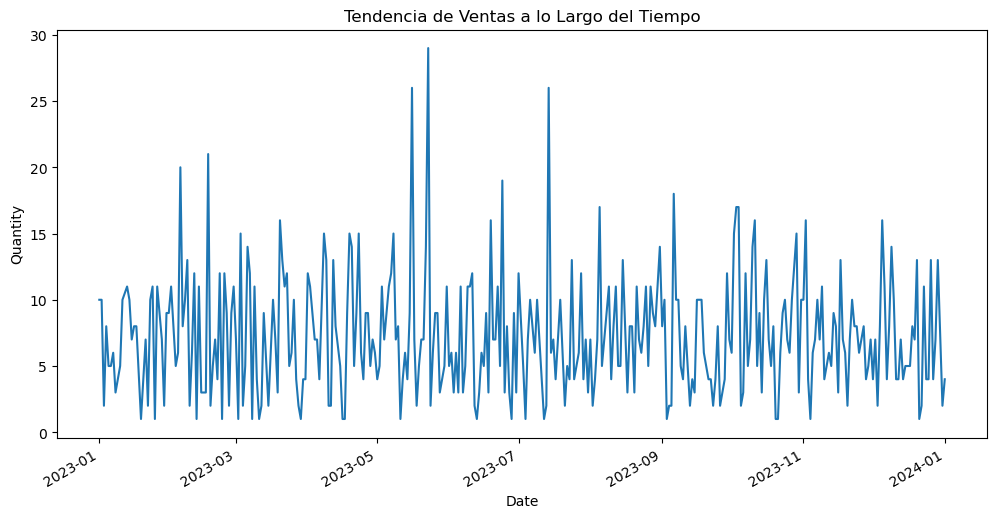

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por fecha y calcular las ventas diarias 
ventas_por_fecha = df.groupby('Date')['Quantity'].sum()  

# Gráfico de líneas
plt.figure(figsize=(12, 6))
ventas_por_fecha.plot(kind='line')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

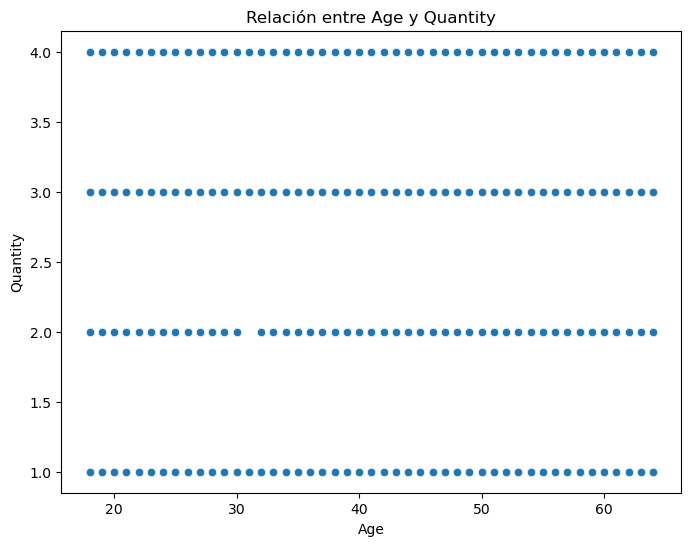

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Quantity')  
plt.title('Relación entre Age y Quantity')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

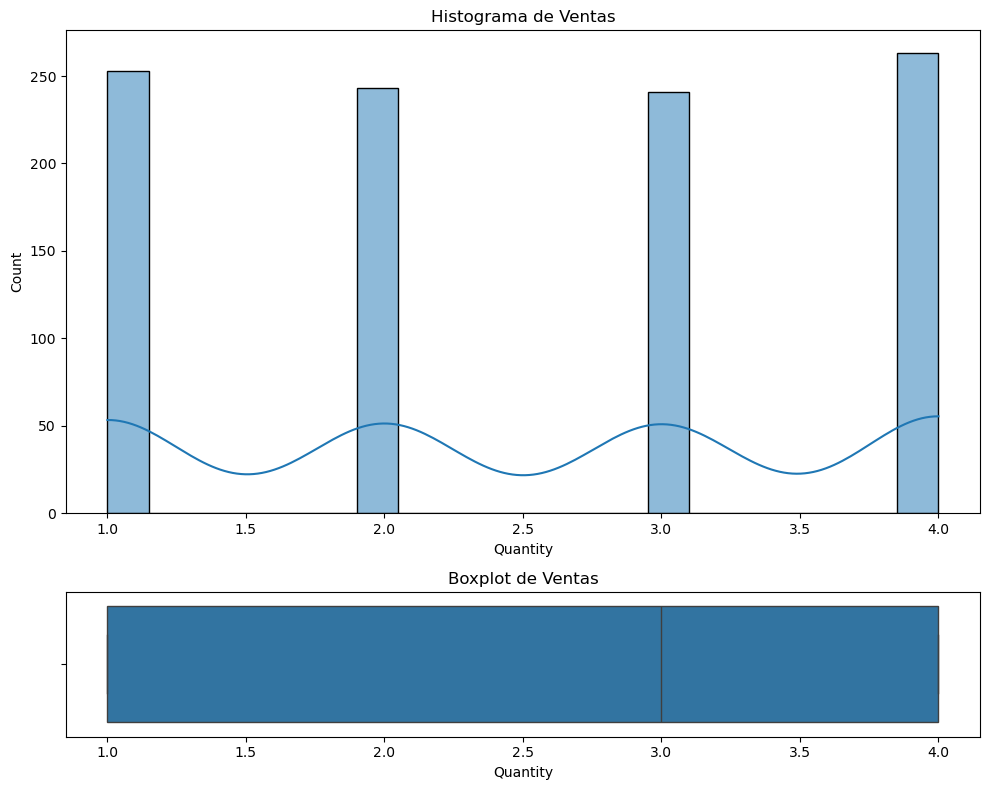

In [22]:
# Crear una figura con subplots para combinar histogramas y boxplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 0.3]})

# Histograma de ventas
sns.histplot(df['Quantity'], bins=20, ax=axs[0], kde=True) 
axs[0].set_title('Histograma de Ventas')

# Boxplot de ventas
sns.boxplot(x=df['Quantity'], ax=axs[1], orient='h')
axs[1].set_title('Boxplot de Ventas')

plt.tight_layout()
plt.show()


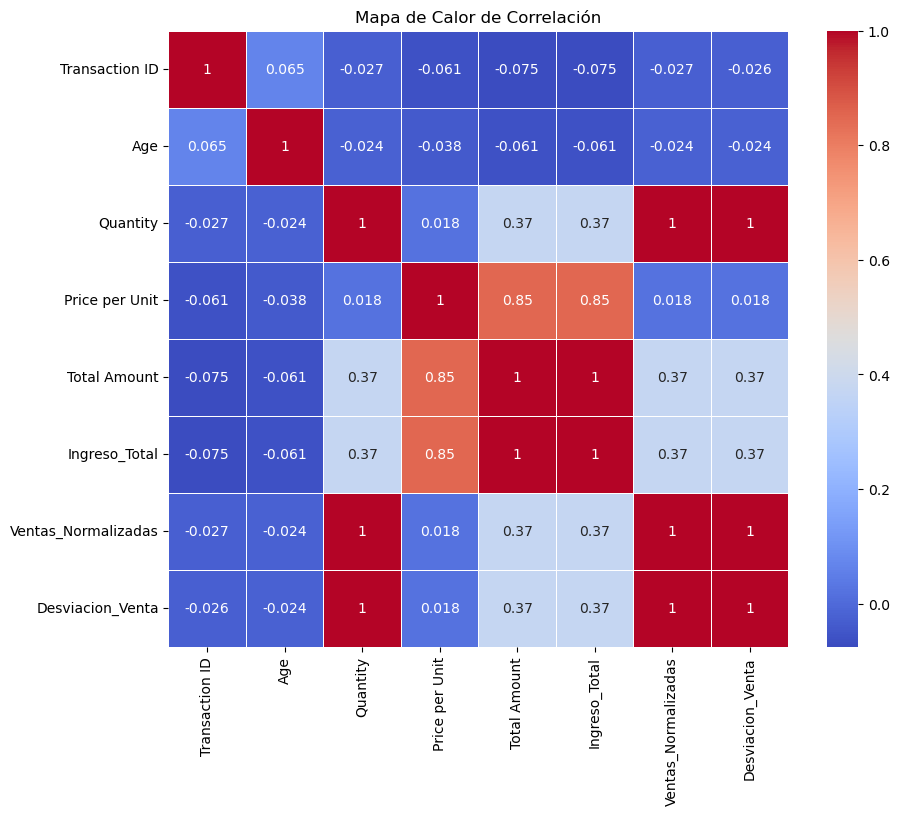

In [27]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

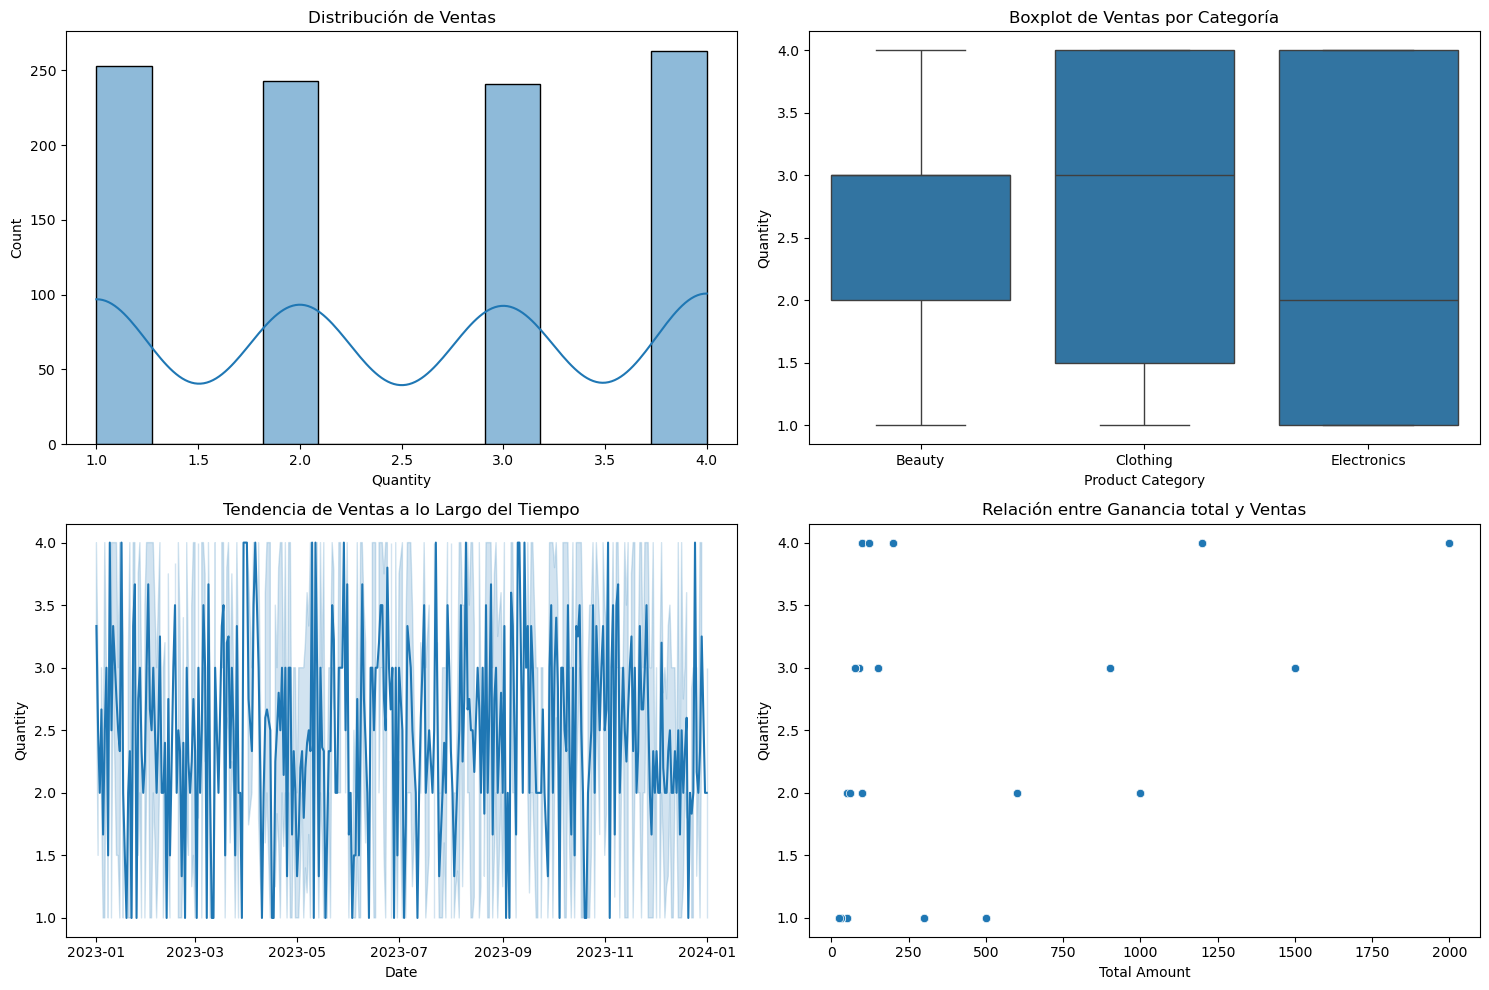

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Quantity'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Ventas')

sns.boxplot(x='Product Category', y='Quantity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Ventas por Categoría')

sns.lineplot(x='Date', y='Quantity', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tendencia de Ventas a lo Largo del Tiempo')

sns.scatterplot(x='Total Amount', y='Quantity', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relación entre Ganancia total y Ventas')

plt.tight_layout()
plt.show()

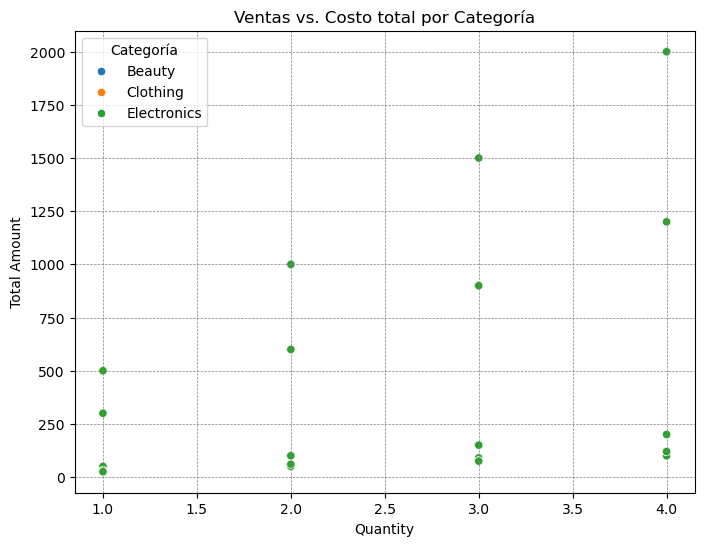

In [29]:
# Ejemplo con cuadrícula y anotación en el gráfico de dispersión
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', ax=ax)
ax.set_title('Ventas vs. Costo total por Categoría')
ax.grid(True, linestyle='--', color='gray', linewidth=0.5)
ax.legend(title='Categoría')

# Anotación de un punto importante y una flecha
ax.annotate('Máyor venta', xy=(df['Total Amount'].max(), df['Total Amount'].max()), 
            xytext=(df['Quantity'].max() - 10, df['Total Amount'].max() + 5),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
